In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('colorblind')

/var/folders/23/7hcv_qtd60j5mx97z8mfdjgh0000gn/T/ipykernel_34757/921116893.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from generate_corpora import corpus_from_json
from analysis import *

## Results for retrained RNN models on Clefting & Topicalization (w/intro)

In [3]:
retrained_constructions = ['cleft', 'intro_topic']
constructions = ['cleft', 'intro_topic', 'nointro_topic', 'tough']
all_island_effects = []
all_island_surprisals = []
for model in retrained_constructions:
    for construction in constructions:
        control_filename =  os.path.join("grammar_outputs", "experiment2", model, f"{construction}_grammar_c.json")
        island_filename =  os.path.join("grammar_outputs", "experiment2", model, f"{construction}_grammar_i.json")
        control_tuples = corpus_from_json(control_filename, is_tuples = True)
        island_tuples = corpus_from_json(island_filename, is_tuples = True)
        all_island_effects += island_effects_for_model(model, control_tuples, island_tuples, construction)
        all_island_surprisals += island_surprisals("control", control_tuples, model, construction)
        all_island_surprisals += island_surprisals("island", island_tuples, model, construction)

cleft_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/cleft_rnn/island_cnp_obj_grnn.json", is_tuples = True)
cleft_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/cleft_rnn/island_cnp_that_grnn.json", is_tuples = True)
topic_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/topic_rnn/island_cnp_obj_grnn.json", is_tuples = True)
topic_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/topic_rnn/island_cnp_that_grnn.json", is_tuples = True)
cleft_cnp_island_effects = island_effects_for_model("cleft", cleft_cnp_control, cleft_cnp_island, "wh_movement")
topic_cnp_island_effects = island_effects_for_model("intro_topic", topic_cnp_control, topic_cnp_island, "wh_movement")
all_island_surprisals += island_surprisals("control", cleft_cnp_control, 'cleft', "wh_movement")
all_island_surprisals += island_surprisals("island", cleft_cnp_island, 'cleft', "wh_movement")
all_island_surprisals += island_surprisals("control", topic_cnp_control, 'intro_topic', "wh_movement")
all_island_surprisals += island_surprisals("island", topic_cnp_island, 'intro_topic', "wh_movement")

constructions.append("wh_movement")
island_effects = pd.DataFrame(cleft_cnp_island_effects + topic_cnp_island_effects + all_island_effects)
all_island_surprisals = pd.DataFrame(all_island_surprisals)

In [4]:
construction_map = {
    "wh_movement": "Wh-Movement",
    "cleft": "Clefting",
    "intro_topic": "Topicalization with \n Intro",
    "nointro_topic": "Topicalization without \n Intro",
    "tough": "Tough Movement"
}
island_effects = pd.DataFrame(island_effects)
island_effects["construction"] = island_effects['construction'].apply(lambda const: construction_map[const])


Text(0.5, 1.05, 'Filler effects in RNN augmented with Clefting')

<Figure size 4000x2200 with 0 Axes>

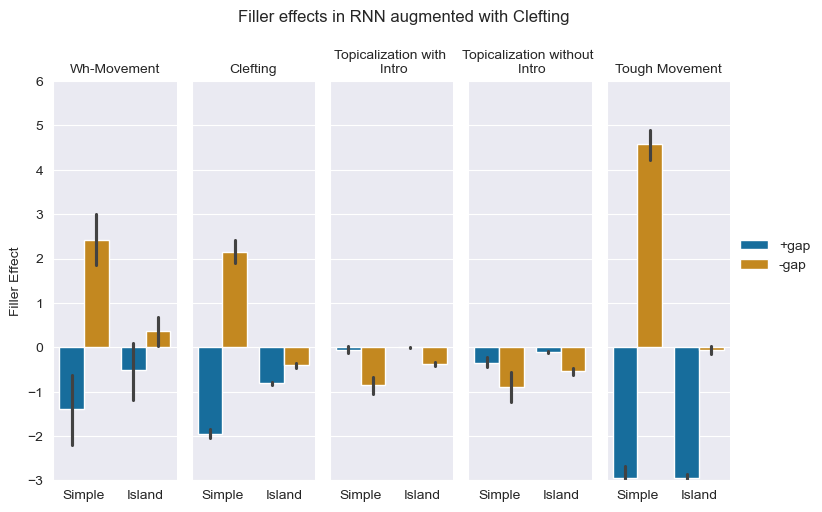

In [5]:
cleft_rnn = island_effects[island_effects['model'] == 'cleft']
plt.figure(figsize=(40, 22))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=cleft_rnn, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.ylim(-3, 6)
plt.suptitle("Filler effects in RNN augmented with Clefting", y = 1.05)
#plt.savefig("figures/gpt2_expt1.png")

Text(0.5, 1.05, 'Filler Effects in LM augmented with Topicalization')

<Figure size 2400x1500 with 0 Axes>

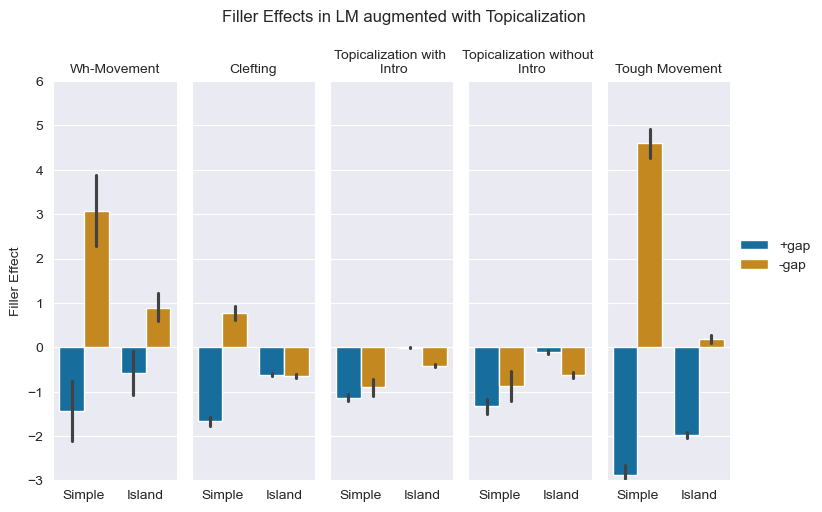

In [6]:
topic_rnn = island_effects[island_effects['model'] == 'intro_topic']
plt.figure(figsize=(24, 15))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=topic_rnn, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.ylim(-3, 6)
plt.suptitle("Filler Effects in LM augmented with Topicalization", y = 1.05)
#plt.savefig("figures/grnn_expt1.png")

In [7]:
island_effects.to_csv("data/augmented_island_effects.csv", index = False)

In [9]:
island_formula = "surprisal~wh*gap*island+(gap||item)"
effects = interaction_effects(island_formula, constructions, retrained_constructions, all_island_surprisals)

/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -43758.889 	 AIC: 87539.779

Random effects:

                 Name     Var    Std
item      (Intercept)   5.868  2.422
item.1            gap  11.146  3.339
Residual                1.776  1.333

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -43758.889 	 AIC: 87539.779

Random effects:

                 Name     Var    Std
item      (Intercept)   5.868  2.422
item.1            gap  11.146  3.339
Residual                1.776  1.333

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -42184.252 	 AIC: 84390.503

Random effects:

                 Name     Var    Std
item      (Intercept)   7.032  2.652
item.1            gap  12.598  3.549
Residual                1.218  1.104

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -42184.252 	 AIC: 84390.503

Random effects:

                 Name     Var    Std
item      (Intercept)   7.032  2.652
item.1            gap  12.598  3.549
Residual                1.218  1.104

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 6480	 Groups: {'item': 1458.0}

Log-likelihood: -14196.681 	 AIC: 28415.362

Random effects:

                 Name     Var    Std
item      (Intercept)   7.389  2.718
item.1            gap  13.199  3.633
Residual                1.262  1.123

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 6480	 Groups: {'item': 1458.0}

Log-likelihood: -14196.681 	 AIC: 28415.362

Random effects:

                 Name     Var    Std
item      (Intercept)   7.389  2.718
item.1            gap  13.199  3.633
Residual                1.262  1.123

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 2187.0}

Log-likelihood: -23952.788 	 AIC: 47927.575

Random effects:

                 Name     Var    Std
item      (Intercept)   6.226  2.495
item.1            gap  19.273  4.390
Residual                2.937  1.714

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 2187.0}

Log-likelihood: -23952.788 	 AIC: 47927.575

Random effects:

                 Name     Var    Std
item      (Intercept)   6.226  2.495
item.1            gap  19.273  4.390
Residual                2.937  1.714

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 224	 Groups: {'item': 28.0}

Log-likelihood: -572.831 	 AIC: 1167.662

Random effects:

                 Name     Var    Std
item      (Intercept)  26.215  5.120
item.1            gap  43.704  6.611
Residual                4.361  2.088

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 224	 Groups: {'item': 28.0}

Log-likelihood: -572.831 	 AIC: 1167.662

Random effects:

                 Name     Var    Std
item      (Intercept)  26.215  5.120
item.1            gap  43.704  6.611
Residual                4.361  2.088

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -41728.615 	 AIC: 83479.230

Random effects:

                 Name     Var    Std
item      (Intercept)   5.292  2.300
item.1            gap  13.060  3.614
Residual                1.227  1.108

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -41728.615 	 AIC: 83479.230

Random effects:

                 Name     Var    Std
item      (Intercept)   5.292  2.300
item.1            gap  13.060  3.614
Residual                1.227  1.108

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -41869.813 	 AIC: 83761.626

Random effects:

                 Name     Var    Std
item      (Intercept)   6.224  2.495
item.1            gap  14.361  3.790
Residual                1.149  1.072

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -41869.813 	 AIC: 83761.626

Random effects:

                 Name     Var    Std
item      (Intercept)   6.224  2.495
item.1            gap  14.361  3.790
Residual                1.149  1.072

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 6480	 Groups: {'item': 1458.0}

Log-likelihood: -14111.224 	 AIC: 28244.447

Random effects:

                 Name     Var    Std
item      (Intercept)   6.654  2.579
item.1            gap  15.311  3.913
Residual                1.187  1.089

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 6480	 Groups: {'item': 1458.0}

Log-likelihood: -14111.224 	 AIC: 28244.447

Random effects:

                 Name     Var    Std
item      (Intercept)   6.654  2.579
item.1            gap  15.311  3.913
Residual                1.187  1.089

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 2187.0}

Log-likelihood: -24111.399 	 AIC: 48244.798

Random effects:

                 Name     Var    Std
item      (Intercept)  10.542  3.247
item.1            gap  17.945  4.236
Residual                2.679  1.637

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 2187.0}

Log-likelihood: -24111.399 	 AIC: 48244.798

Random effects:

                 Name     Var    Std
item      (Intercept)  10.542  3.247
item.1            gap  17.945  4.236
Residual                2.679  1.637

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Fam

/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


In [10]:
pd.DataFrame(effects).reset_index()[['interaction_type', 'Estimate', 'P-val', 'model', 'condition']]

,interaction_type,Estimate,P-val,model,condition
0,filler_gap,-4.096,0.000,cleft,cleft
1,island_filler_gap,3.695,0.000,cleft,cleft
2,filler_gap,0.800,0.000,cleft,intro_topic
3,island_filler_gap,-0.437,0.000,cleft,intro_topic
4,filler_gap,0.545,0.002,cleft,nointro_topic
5,island_filler_gap,-0.112,0.546,cleft,nointro_topic
6,filler_gap,-7.513,0.000,cleft,tough
7,island_filler_gap,4.622,0.000,cleft,tough
8,filler_gap,-3.816,0.000,cleft,wh_movement
9,island_filler_gap,2.942,0.009,cleft,wh_movement
